# Twitter-Analyse for DHd-conference 2022 #
This project aims to analyse the tweets with the hashtag #DHd2022. This years conference has the title "Cultures of digital memory". As Twitter is nowadays producing millions of sources of individual actions, we have to ask ourselfs how does this influences our commemorative culture and what does it mean for culture of digital memory.

With this notebook I try to show what traces of action and interaction a single event like this conference leaves on Twitter and how we can analyse it.

In [1]:
import datetime

from load_tweets import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()
plt.rcParams["figure.figsize"] = (6, 5)
download_tweets = False

We have to connect width the Twitter-API and download the tweets, afterwards they'll be connected with the tweets which were already downloaded. If `download_tweets = False`, no new tweets will be downloaded and only the tweets and user-informations from the csv-files will be used.

In [2]:
"""
Connecting to the API-Client and downloading the tweets with #DHd2022.
"""
tweetsDHd = None
if download_tweets:
    #api_client = connect_api('twitter_api.ini')
    next_token = "start"
    tweetsDHd = []
    while next_token is not None and str(next_token) != '':
        next_token = None if next_token == "start" else next_token
        tmp = search_tweets('#DHd2022', next_token)
        if tmp is None:
            tweetsDHd = None
            break
        try:
            next_token = tmp["meta"]["next_token"]
        except KeyError:
            next_token = None
        print('Downloaded %s Tweets' % tmp["meta"]["result_count"])
        tweetsDHd.append(tmp)

    #with open('data/tweets_DHd2022.json', 'w') as f:
    #    json.dump(tweetsDHd, f)


In [3]:
try:
    tweets_data = pd.read_csv("data/tweets_data.csv", encoding='utf8', dtype={'id': str})
    tweets_user = pd.read_csv("data/twitter_users.csv", encoding='utf8', dtype={'id': str})
except FileNotFoundError:
    tweets_data = None
    tweets_user = None
if tweetsDHd is not None:
    for r in tweetsDHd:
        if tweets_data is None:
            tweets_data = pd.DataFrame(r["data"])
        else:
            tmp = pd.DataFrame(r["data"])
            for _,v in tmp.iterrows():
                if v['id'] not in tweets_data['id'].tolist():
                    tweets_data = tweets_data.append(v)
                else: 
                    continue
        if tweets_user is None:
            tweets_user = pd.DataFrame(r["includes"]["users"])
        else:
            tmp = pd.DataFrame(r["includes"]["users"])
            for _,v in tmp.iterrows():
                if v['id'] not in tweets_user['id'].tolist():
                    tweets_user = tweets_user.append(v)
        print(r["includes"].keys())
    tweets_data.to_csv("data/tweets_data.csv", encoding='utf8', index=False)
    tweets_user.to_csv("data/twitter_users.csv", encoding='utf8', index=False)


Now the datetime information in the columns `created_at` will be converted into a python object from the class datetime.datetime.

In [4]:
tweets_data = convert_datetime(tweets_data, 'created_at')
tweets_user = convert_datetime(tweets_user, 'created_at')
tweets_data

,entities,lang,author_id,source,public_metrics,in_reply_to_user_id,created_at,id,text,geo
0,"{'urls': [{'start': 87, 'end': 110, 'url': 'ht...",de,810555350944464896,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",8.105554e+17,2022-02-23 10:46:13,1496436224738869250,immer noch anmelden. Bis zum 28.2. ist die Anm...,NaN
1,"{'hashtags': [{'start': 236, 'end': 244, 'tag'...",de,810555350944464896,Twitter Web App,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",8.105554e+17,2022-02-23 10:46:12,1496436223291936772,unseren Gather-Raum. Auch das Kulturelle soll ...,NaN
2,"{'mentions': [{'start': 3, 'end': 11, 'usernam...",en,911193053641273344,TweetDeck,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",NaN,2022-02-23 10:41:32,1496435048454709249,RT @UWuttke: 📢 Thursday the one and only @etot...,NaN
3,"{'mentions': [{'start': 3, 'end': 11, 'usernam...",de,1421172834,TweetDeck,"{'retweet_count': 5, 'reply_count': 0, 'like_c...",NaN,2022-02-23 10:35:59,1496433653022437376,RT @UWuttke: Ich freue mich schon riesig auf d...,NaN
4,"{'hashtags': [{'start': 73, 'end': 81, 'tag': ...",de,391926702,TweetDeck,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",NaN,2022-02-23 09:55:27,1496423448666587140,RT @msiemund: Vorm Schlafengehen noch ein klei...,NaN
...,...,...,...,...,...,...,...,...,...,...
3778,"{'mentions': [{'start': 127, 'end': 135, 'user...",de,1341726401242816516,Twitter for iPhone,"{'retweet_count': 2, 'reply_count': 1, 'like_c...",NaN,2022-03-18 11:18:35,1504779291048951809,🤩😍🎉 gerade angekommen: mein #dhd2022 #GatherCh...,NaN
3779,"{'hashtags': [{'start': 252, 'end': 261, 'tag'...",en,629155988,Twitter Web App,"{'retweet_count': 0, 'reply_count': 3, 'like_c...",6.291560e+08,2022-03-18 11:11:06,1504777408049733633,3/3 And the problem only increases with the nu...,NaN
3780,"{'mentions': [{'start': 3, 'end': 19, 'usernam...",de,402625250,TweetDeck,"{'retweet_count': 7, 'reply_count': 0, 'like_c...",NaN,2022-03-18 08:20:04,1504734368962600965,RT @DominikBoenisch: Das Poster zu #Trainingth...,NaN
3781,"{'mentions': [{'start': 3, 'end': 17, 'usernam...",de,1493004805689724928,Twitter Web App,"{'retweet_count': 10, 'reply_count': 0, 'like_...",NaN,2022-03-18 00:27:48,1504615518766088199,RT @uclab_potsdam: Mehr Informationen zum Proj...,NaN


In [5]:
tweets_user

,public_metrics,verified,id,username,entities,name,created_at,description
0,"{'followers_count': 16641, 'following_count': ...",False,"8,10555350944465E+017",realsci_DE,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",Melanie @ Real Scientists DE,2016-12-18 18:40:29,Das deutschsprachige @RealScientists. Echte Wi...
1,"{'followers_count': 957, 'following_count': 11...",False,"9,11193053641273E+017",openmethods_dh,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",OpenMethods,2017-09-22 11:38:47,"OpenMethods Metablog, Humanities at Scale, a D..."
2,"{'followers_count': 1670, 'following_count': 9...",False,1421172834,UWuttke,"{'url': {'urls': [{'start': 0, 'end': 22, 'url...",Ulrike Wuttke,2013-05-11 17:31:09,Interim Professor at University of Applied Sci...
3,"{'followers_count': 2158, 'following_count': 1...",False,391926702,RappAndrea,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",Andrea Rapp,2011-10-16 09:24:18,Professor of Computational Philology and Medie...
4,"{'followers_count': 1076, 'following_count': 1...",False,61145089,msiemund,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",Melanie Seltmann,2009-07-29 08:03:30,"#DH, #LIS, #Linguistik #Liebesbriefe & mehr | ..."
...,...,...,...,...,...,...,...,...
659,"{'followers_count': 2274, 'following_count': 1...",False,"1,24643020242468E+018",agilekultur,"{'description': {'hashtags': [{'start': 12, 'e...",#AgileKultur,2020-04-04 13:31:45,"Netzwerk zu #Agilität, #Digitales und #Innovat..."
660,"{'followers_count': 2887, 'following_count': 5...",False,"1,22030108697793E+018",NFDI_de,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",Nationale Forschungsdateninfrastruktur (NFDI) ...,2020-01-23 11:05:07,German National Research Data Infrastructure. ...
661,"{'followers_count': 1824, 'following_count': 2...",False,"8,14324949368402E+017",AFabregasT,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",Alejandro Fábregas Tejeda,2016-12-29 04:19:32,Historian and philosopher of science • Mexican...
662,"{'followers_count': 2, 'following_count': 85, ...",False,"1,50173777604744E+018",TheTVOutsider,NaN,Tennessee Valley Outsider,2022-03-10 01:53:21,"What's outside in Huntsville, Birmingham, Chat..."


## Twitter-Applications and languages ##
In the following part, a pie- and a bar-plot will be created by using the function `value_plot()`. We can see the tweets by source from which they were send, and the languages used in the tweets.

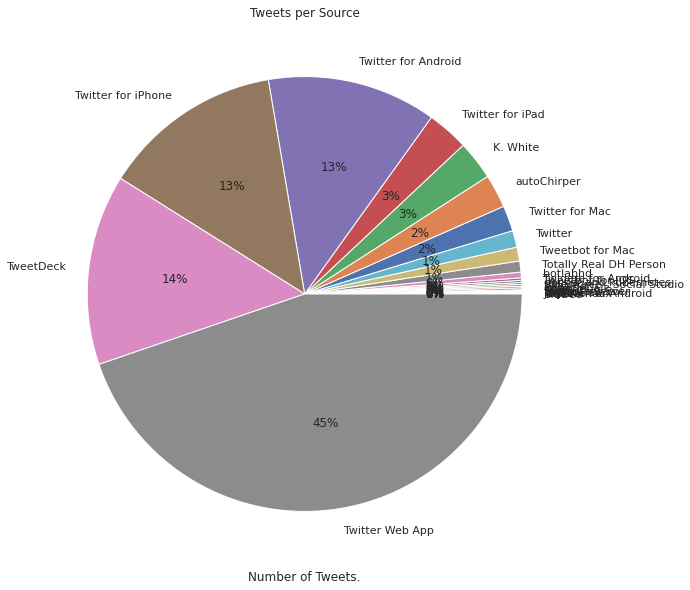

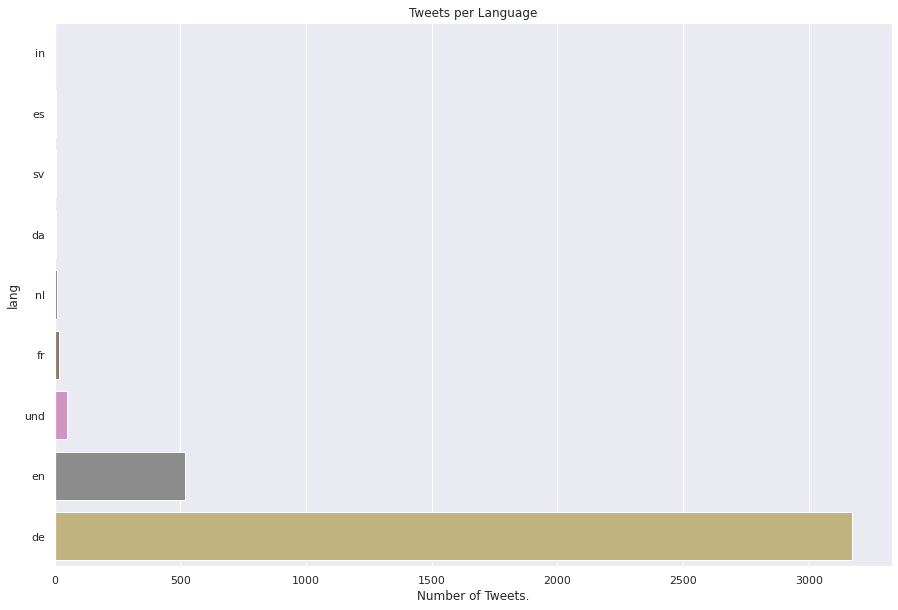

in        1
es        4
sv        5
da        7
nl        9
fr       19
und      48
en      519
de     3171
dtype: int64


In [6]:
def value_plot(value: str, df: pd.DataFrame, title: str, x_label: str="", save: bool = False, mode:str = 'bar', print_data: bool=False):
    """
    Creates a bar- or pie-plot by counting the occurrences of a given value.
    
    :param save: Whether to save the created figure.
    :param value: The value to plot.
    :param df: The Dataframe with the values.
    :param title: The title of the dataframe.
    :param x_label: The label for the x-axe. Default: the name of the plotted value.
    :param mode: The mode of the plot, can be bar or pie. Default: 'bar'
    :param print_data: If the used data should be printed out as well. Default: False
    """
    plt.rcParams["figure.figsize"] = (15, 10)
    data = df.groupby(by=value, as_index=False).count()[[value, "id"]].sort_values(by="id")
    if mode == 'bar':
        sns.barplot(data=data, y=value, x="id", orient='h')
    elif mode == 'pie':
        plt.pie(data["id"], labels=data[value], colors=sns.color_palette('deep')[0:data.shape[0]], autopct='%.0f%%')
    else:
        raise ValueError('Mode of the plot has to be "bar" or "pie", not "%s"!' % mode)
    if x_label != "":
        plt.xlabel(x_label)
    plt.title(title)
    if save:
        plt.savefig("vis/{}.png".format(title.replace(' ', '_')))
    plt.show()
    if print_data:
        print(pd.Series({val[value]: val['id'] for _, val in data.iterrows()}))

value_plot("source", tweets_data, "Tweets per Source", "Number of Tweets.", save=True, mode='pie')
value_plot("lang", tweets_data, "Tweets per Language", "Number of Tweets.", mode='bar', print_data=True)

## User information ##
The data in the column `public_metrics` is already in the format of a dictionary and will now be converted into dictionary-objects to analyse the user specific data. For example how many followers a user has or how many others are following him.

In [7]:
def str_to_dict(string_dict: str) -> dict:
    """
    Converts a string from type {'A': 0, 'B': 1, 'C': 2} into a dict object.
    
    :param string_dict: The string to convert.
    :return: The dictionary.
    """
    if type(string_dict) is dict:
        string_dict: dict
        return string_dict
    values = string_dict.strip('{').strip('}').split(', ')
    output_dict = {}
    for val in values:
        val = val.split(': ')
        output_dict[val[0].strip("'")] = int(val[1])
    return output_dict


public_metrics_users = pd.DataFrame(list(map(str_to_dict, tweets_user["public_metrics"].tolist())))
public_metrics_users.loc[:10]

,followers_count,following_count,tweet_count,listed_count
0,16641,1170,64026,153
1,957,118,293,36
2,1670,965,8608,79
3,2158,1705,9376,90
4,1076,1928,18497,84
5,768,207,847,11
6,814,769,4188,20
7,424,462,174342,18
8,798,640,2523,28
9,123,109,200,0


This information is visualized in boxplots.

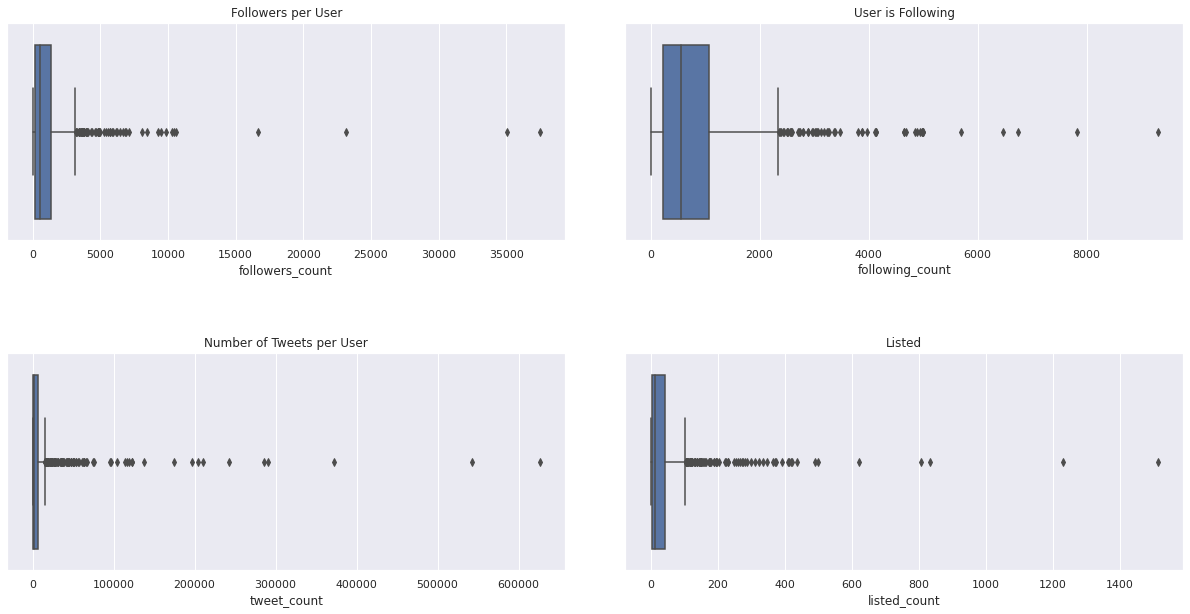

In [8]:
plt.rcParams["figure.figsize"] = (18, 10)
fig, axes = plt.subplots(2,2)
sns.boxplot(data = public_metrics_users, x ="followers_count", orient="h", ax = axes[0][0])
sns.boxplot(data = public_metrics_users, x ="following_count", orient="h", ax = axes[0][1])
sns.boxplot(data = public_metrics_users, x ="tweet_count", orient="h", ax = axes[1][0])
sns.boxplot(data = public_metrics_users, x ="listed_count", orient="h", ax = axes[1][1])
axes[0][0].set_title("Followers per User")
axes[0][1].set_title("User is Following")
axes[1][0].set_title("Number of Tweets per User")
axes[1][1].set_title("Listed")
fig.tight_layout(pad=5)
plt.savefig("vis/user_information.png")
plt.show()

In [9]:
tweets_user["public_metrics"] = pd.Series(map(str_to_dict, tweets_user["public_metrics"].tolist()))

## Tweets over time ##
In the following cells I'll try to visualize the time information of the tweets.

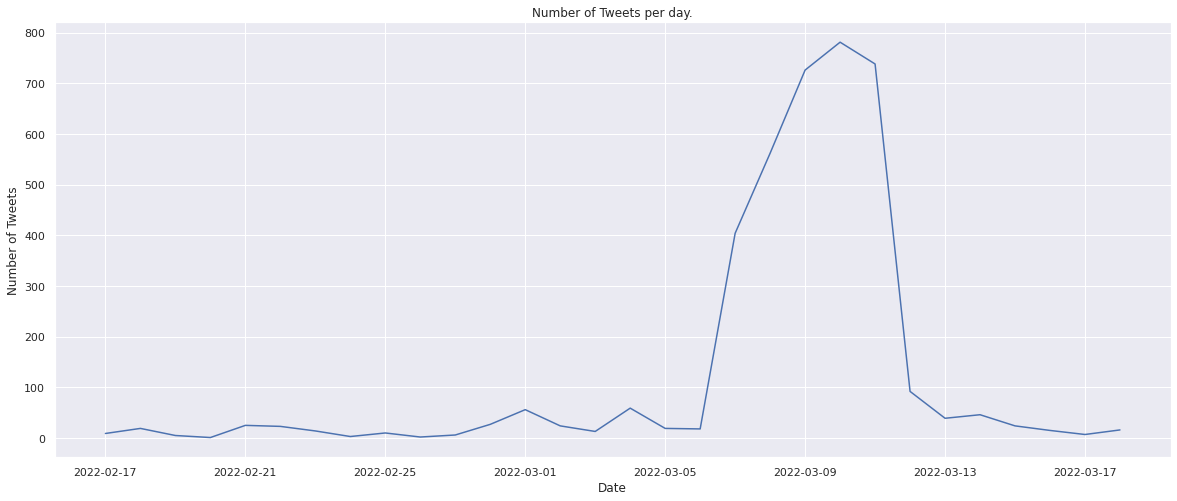

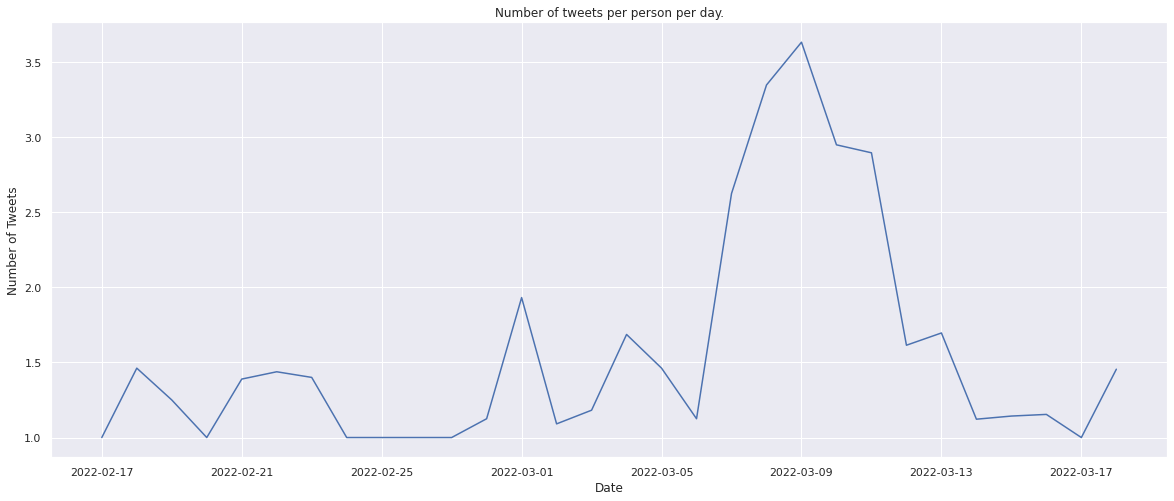

In [10]:
date_tweets = tweets_data['created_at'].sort_values().tolist()
start_date = datetime.datetime(date_tweets[0].year, date_tweets[0].month, date_tweets[0].day) # Date of the first Tweet
end_date = datetime.datetime(date_tweets[-1].year, date_tweets[-1].month, date_tweets[-1].day) # Date of the last Tweet
equal_day = lambda x, y: x.day == y.day and x.month == y.month and x.year == y.year
tweets_over_time = {}
date_delta = start_date
while date_delta <= end_date:
    tweets_over_time[date_delta] = [0, []]
    date_delta = date_delta + datetime.timedelta(days=1)
for _, v in tweets_data.iterrows():
    try:
        tweets_over_time[datetime.datetime(v['created_at'].year, v['created_at'].month, v['created_at'].day)][0] += 1
        tweets_over_time[datetime.datetime(v['created_at'].year, v['created_at'].month, v['created_at'].day)][1].append(v['author_id'])
    except KeyError:
        continue
tweets_over_time = [(i, tweets_over_time[i][0], len(set(tweets_over_time[i][1]))) for i in tweets_over_time.keys()]
plt.rcParams["figure.figsize"] = (20, 8)
plt.plot([i[0] for i in tweets_over_time], [i[1] for i in tweets_over_time])
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per day.')
plt.savefig("vis/Number_of_tweets_per_day.png")
plt.show()
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of tweets per person per day.')
plt.plot([i[0] for i in tweets_over_time], [i[1]/i[2] if i[2]!=0 else 0 for i in tweets_over_time])
plt.show()

In the weeks before the conference, the users send at an average 18.5 Tweets per day.
The standart deveation is 15.95566774952817



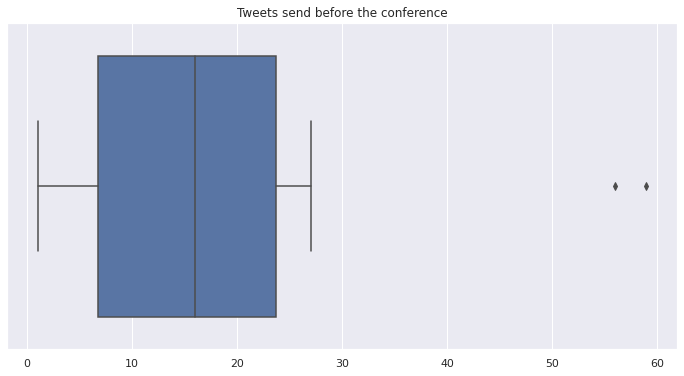

In [11]:
tweets_before = list(map(lambda x: x[1], filter(lambda x: x[0] < datetime.datetime(2022, 3, 7, 0, 0, 0), tweets_over_time)))
print("In the weeks before the conference, the users send at an average %s Tweets per day." % np.mean(tweets_before))
print("The standart deveation is %s\n" % np.std(tweets_before))
plt.rcParams["figure.figsize"] = (12, 6)
sns.boxplot(x = tweets_before)
plt.title("Tweets send before the conference")
plt.show()

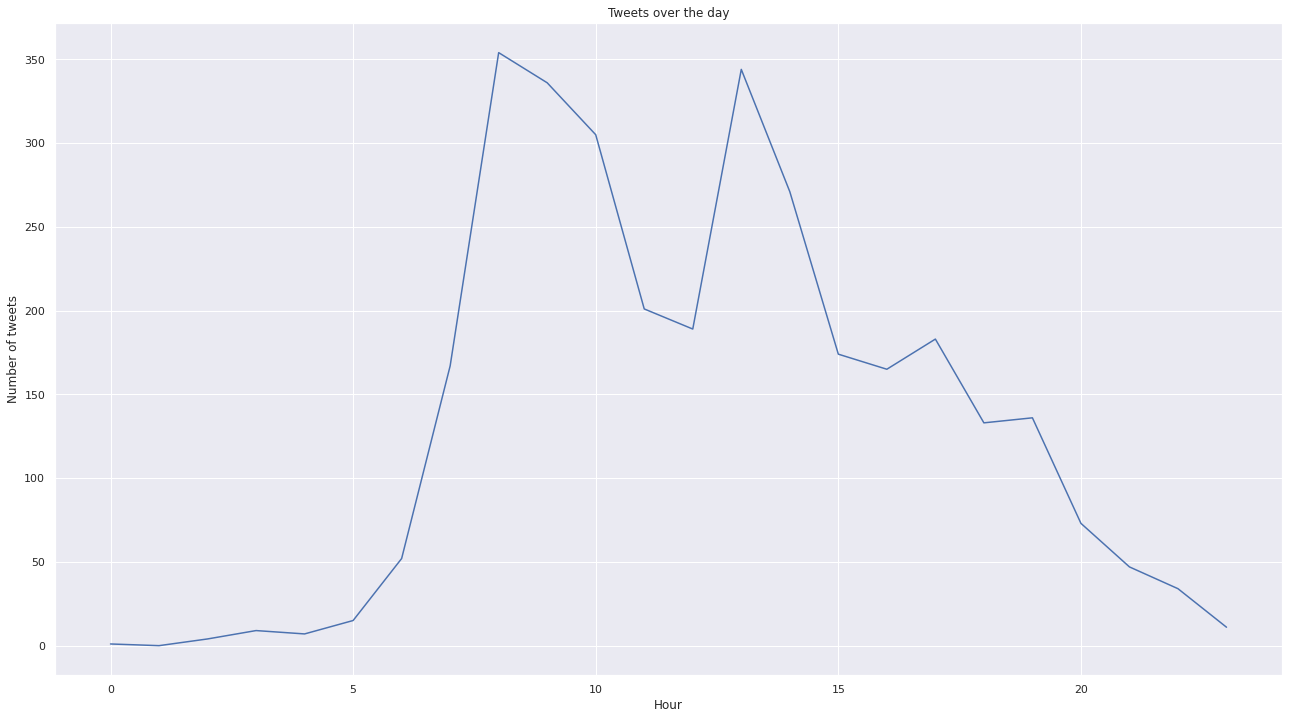

In [12]:
time_of_day = {i: 0 for i in range(0, 24)}
for _, v in tweets_data.loc[tweets_data.created_at > datetime.datetime(2022, 3, 6, 23, 59, 59)].loc[tweets_data.created_at < datetime.datetime(2022, 3, 12)].iterrows():
    time_of_day[v["created_at"].hour] += 1
plt.rcParams["figure.figsize"] = (22, 12)
plt.plot([i for i in time_of_day.keys()], [time_of_day[i] for i in time_of_day.keys()])
plt.title("Tweets over the day")
plt.xlabel("Hour")
plt.ylabel("Number of tweets")
plt.savefig("vis/Tweets_over_day.png")
plt.show()

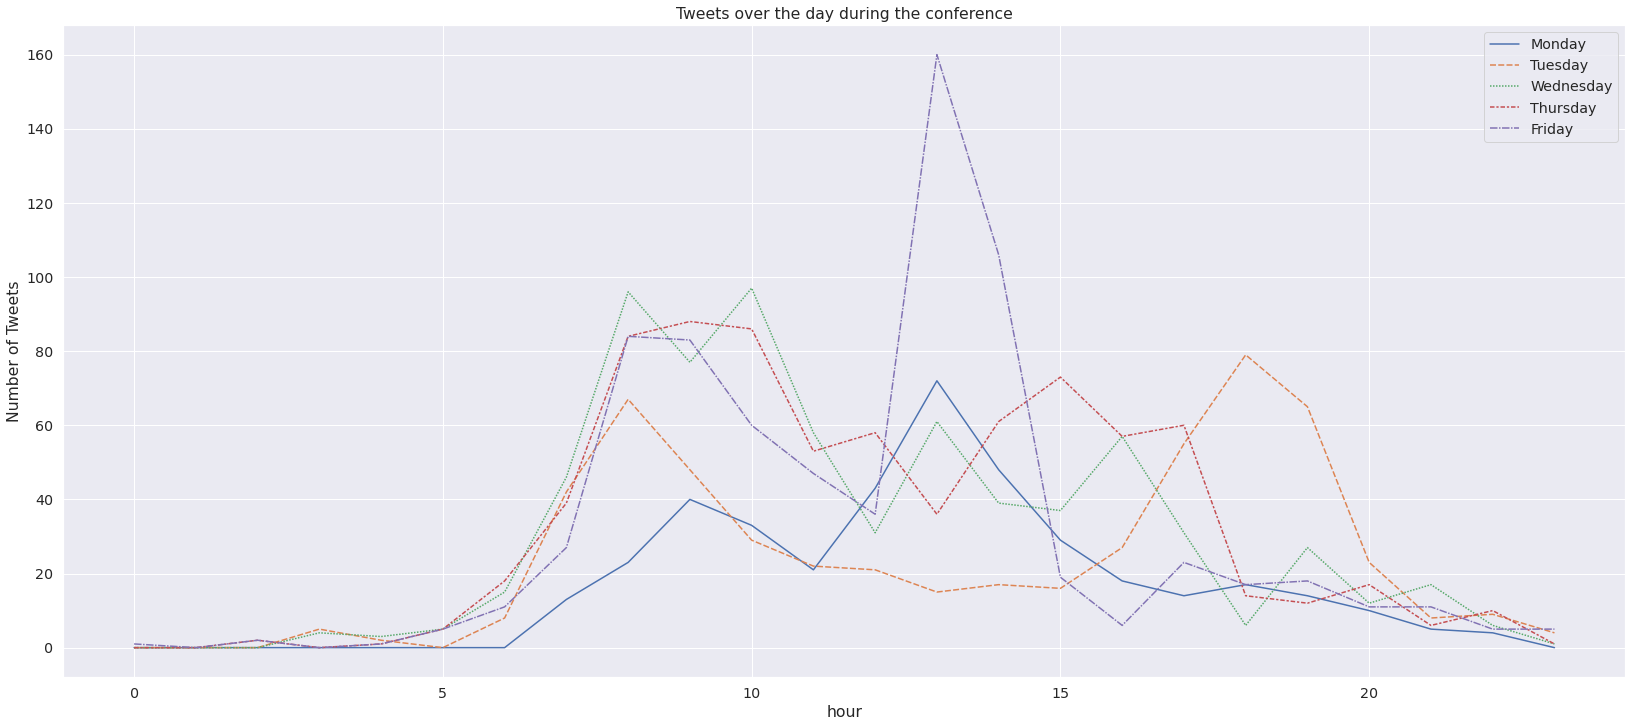

In [13]:
tweets_during = tweets_over_time
tweets_per_hour = {i: {"Monday": 0, "Tuesday": 0, "Wednesday": 0, "Thursday": 0, "Friday": 0, } for i in range(0, 24)}
weekdays = list(tweets_per_hour[0].keys())
for i in range(7, 12):
    tweets_during = pd.DataFrame(map(lambda x: (x.hour, 1),
                                     filter(lambda x: datetime.datetime(2022, 3, i, 0, 0, 0) < x < datetime.datetime(2022, 3, i, 23, 59, 59),
                                            tweets_data["created_at"].sort_values().tolist())),
                                 columns=["hour", "n"]).groupby(by="hour", as_index=False).count()
    for _,v in tweets_during.iterrows():
        tweets_per_hour[v["hour"]][weekdays[i-7]] = v["n"]
tweets_during = pd.DataFrame(tweets_per_hour).T
plt.rcParams["figure.figsize"] = (28, 12)
sns.set_context('notebook', font_scale=1.3, rc={"lines.linewidth": 1.5})
sns.lineplot(data=tweets_during)
plt.title("Tweets over the day during the conference")
plt.xlabel("hour")
plt.ylabel("Number of Tweets")
plt.savefig("vis/Tweets_over_day_during_DHd.png")
plt.show()

In [18]:
print("During the conference: At an average %s Tweets per day." % np.mean([np.sum(tweets_during[col]) for col in list(tweets_during)]))

During the conference: At an average 642.2 Tweets per day.


## Text of the tweets ##
In the following cell, the text from the tweets shall be visualized in a wordcloud.

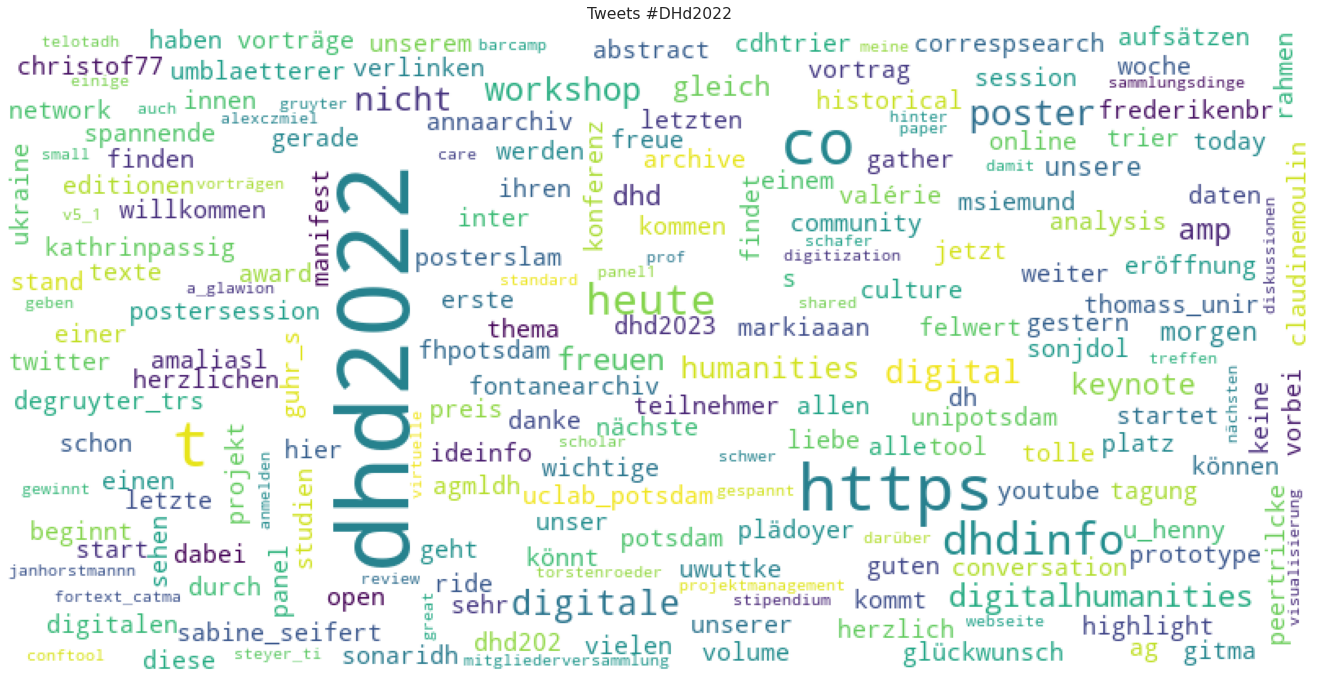

In [15]:
from wordcloud import WordCloud, STOPWORDS
def create_wordcloud(corpus: list, title: str):
    corpus_all = ''
    for i in corpus:
        corpus_all += i + ' '
    corpus_arr = map(lambda x: x.strip().replace(' ', '').lower(), list(filter(lambda x: len(x)>4 and (str(x) not in ('\n', '\t')), corpus_all.split(" "))))
    corpus_all = ''
    for i in corpus_arr: corpus_all += i + ' '
    corpus_all = corpus_all.lower()
    cloud = WordCloud(background_color="white", max_words=200, stopwords=set(STOPWORDS), max_font_size=60, relative_scaling=.5, height=400, width=800)
    cloud.collocations = False
    cloud.generate_from_text(corpus_all)
    plt.figure()
    plt.imshow(cloud)
    plt.title(title)
    plt.axis("off")
    plt.savefig('vis/DHd_tweets_wordcloud.png')
    plt.show()

create_wordcloud(tweets_data["text"].tolist(), 'Tweets #DHd2022')

In [16]:
print(np.min(tweets_data['created_at']))
print(np.max(tweets_data['created_at']))

2022-02-17 11:32:05
2022-03-18 20:32:20
